<a href="https://colab.research.google.com/github/panghanwu/machine_learning_Elwing/blob/main/CNN_GAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import cifar10

# load
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# label
label = [
          'airplane',
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck'
]

In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
y_test  # list in array

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

answer: truck


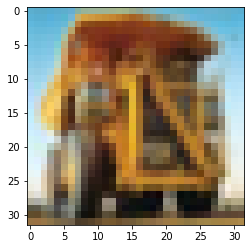

In [3]:
import matplotlib.pyplot as plt
import random

idx = random.randint(0, x_train.shape[0]-1)
print('answer:', label[y_train[idx][0]])
plt.imshow(x_train[idx])

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D

layers = [
          # (3*3*3)*64+64
          Conv2D(64, 3, padding='same', activation='relu', input_shape=(32,32,3)),
          MaxPooling2D(),
          # (3*3*64)*128+128
          Conv2D(128, 3, padding='same', activation='relu'),
          MaxPooling2D(),
          Conv2D(256, 3, padding='same', activation='relu'),
          MaxPooling2D(),
          GlobalAveragePooling2D(),
          Dense(10, activation='softmax')
]

model = Sequential(layers)
model.summary()
# 只加一層Dense就是logistic regression

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 256)               0

In [5]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

x_train_norm = x_train / 255
x_test_norm = x_test / 255

model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=['accuracy'])

callbacks = [
    ModelCheckpoint("model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm, 
     y_train,
     batch_size=100,
     epochs=100,
     validation_split=0.1,
     callbacks=callbacks)

Epoch 1/100
450/450 [==============================] - 4s 9ms/step - loss: 1.7161 - accuracy: 0.3655 - val_loss: 1.4517 - val_accuracy: 0.4786
Epoch 2/100
450/450 [==============================] - 4s 8ms/step - loss: 1.3857 - accuracy: 0.5017 - val_loss: 1.2894 - val_accuracy: 0.5394
Epoch 3/100
450/450 [==============================] - 4s 8ms/step - loss: 1.2321 - accuracy: 0.5616 - val_loss: 1.2005 - val_accuracy: 0.5726
Epoch 4/100
450/450 [==============================] - 4s 8ms/step - loss: 1.1269 - accuracy: 0.6019 - val_loss: 1.0498 - val_accuracy: 0.6378
Epoch 5/100
450/450 [==============================] - 4s 8ms/step - loss: 1.0359 - accuracy: 0.6382 - val_loss: 0.9972 - val_accuracy: 0.6528
Epoch 6/100
450/450 [==============================] - 4s 8ms/step - loss: 0.9731 - accuracy: 0.6592 - val_loss: 0.9479 - val_accuracy: 0.6696
Epoch 7/100
450/450 [==============================] - 4s 8ms/step - loss: 0.9183 - accuracy: 0.6791 - val_loss: 0.9031 - val_accuracy: 0.6848

In [6]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7011 - accuracy: 0.7642


[0.7011492848396301, 0.76419997215271]

In [7]:
from sklearn.metrics import confusion_matrix
import pandas as pd

pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      index=["{}(Org)".format(n) for n in range(10)],
      columns=["{}(Pre)".format(n) for n in range(10)])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,0(Pre),1(Pre),2(Pre),3(Pre),4(Pre),5(Pre),6(Pre),7(Pre),8(Pre),9(Pre)
0(Org),776,10,57,37,14,6,7,8,52,33
1(Org),18,818,7,12,5,4,6,3,15,112
2(Org),44,1,648,75,84,52,73,16,2,5
3(Org),16,1,60,622,52,141,62,25,12,9
4(Org),8,1,42,42,776,38,55,26,10,2
5(Org),6,1,32,167,43,684,19,33,6,9
6(Org),7,0,38,63,26,22,835,3,4,2
7(Org),17,2,36,40,76,60,8,750,1,10
8(Org),49,14,11,27,6,7,6,1,854,25
9(Org),19,38,8,17,4,5,4,7,19,879


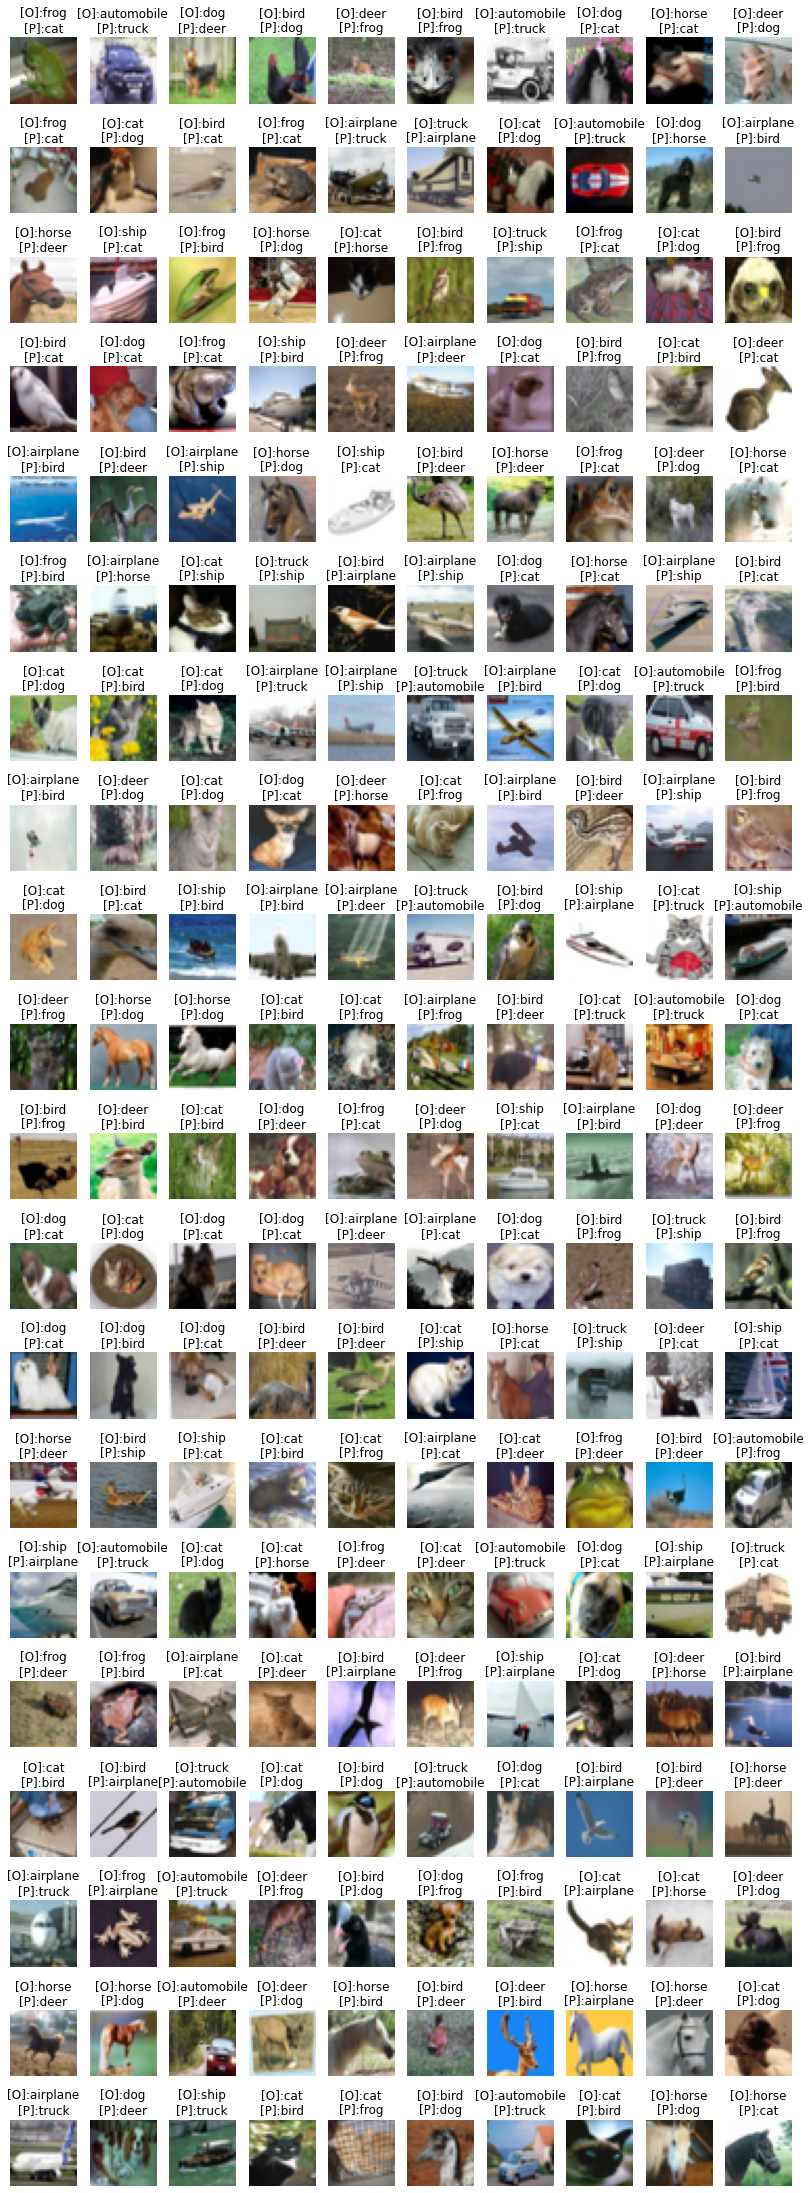

In [8]:
import numpy as np

pre = model.predict_classes(x_test_norm)
y_test_r = y_test.reshape(10000)

idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]
false_img = x_test[idx]
false_label = y_test_r[idx]
false_pre = pre[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(false_img) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[O]:{}\n[P]:{}".format(label[false_label[i]], label[false_pre[i]])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])

輸入網址:https://crazypetter.com.tw/wp-content/uploads/2019/07/BLOW-%E6%88%90%E9%95%B7%E5%8F%B2_190610_0910.jpg


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


airplane 的機率是: 0.001
automobile 的機率是: 0.001
bird 的機率是: 0.001
cat 的機率是: 0.915
deer 的機率是: 0.018
dog 的機率是: 0.05
frog 的機率是: 0.003
horse 的機率是: 0.011
ship 的機率是: 0.0
truck 的機率是: 0.0
應該是 cat


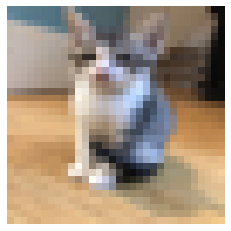

In [9]:
import PIL
import requests

url = input('輸入網址:')
response = requests.get(url, stream=True, verify=False)

img = PIL.Image.open(response.raw).resize((32, 32))
img_np = np.array(img)
test = img_np.reshape(1,32,32,3) / 255
probs = model.predict(test)[0]

for i, p in enumerate(probs):
    print(label[i], '的機率是:', round(p, 3))
ans = model.predict_classes(test)[0]
print('應該是', label[ans])

plt.axis('off')
plt.imshow(img_np)